# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment


In [1]:
import gym
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time

from unityagents import UnityEnvironment

# Test whether GPU or CPU is used for calculations
device = "gpu" if torch.cuda.is_available() else "cpu"
print(f"Target device is {device}", end="\n")

# Load environment from Unity executable
env = UnityEnvironment(file_name="C:/Users/Simon/PYTHON/Deep_Reinforcement_Learning_Nanodegree_UDACITY/Projet1_Bananas/Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name] # reset the environment

# print details about the environment
    # number of agents in the environment
print('Number of agents:', len(env_info.agents))

    # number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

    # examine the state space
state = env_info.vector_observations[0]
print('States look like:', state.shape)
state_size = len(state)
print('States have length:', state_size)

C:\Users\Simon\anaconda3\envs\DRL_udacity_cpu\lib\site-packages\gym\core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


Target device is cpu


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: (37,)
States have length: 37


In [2]:
state = env_info.vector_observations[0] # tableau unidimensionnel (vecteur)
state

array([1.        , 0.        , 0.        , 0.        , 0.84408134,
       0.        , 0.        , 1.        , 0.        , 0.0748472 ,
       0.        , 1.        , 0.        , 0.        , 0.25755   ,
       1.        , 0.        , 0.        , 0.        , 0.74177343,
       0.        , 1.        , 0.        , 0.        , 0.25854847,
       0.        , 0.        , 1.        , 0.        , 0.09355672,
       0.        , 1.        , 0.        , 0.        , 0.31969345,
       0.        , 0.        ])

### 2. Train the model

In [3]:
def train_dqn_agent(n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, threshold = 13.0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    window_size = 100                                      # Window size for average loss and average score
    scores = []                                            # list containing scores from each episode
    scores_window = deque(maxlen=window_size)              # last 100 scores
    losses = []                                            # To store the loss at each stage
    losses_window = deque(maxlen=window_size)  # To store the latest losses
    eps_log = []
    df = pd.DataFrame(columns=['Episode', 'Score', 'Average Score', 'Loss', 'Average Loss', 'Epsilon']) # dataframe containing scores_window
    eps = eps_start                                        # initialize epsilon
                                          # trigger level
    
    for i_episode in range(1, n_episodes+1):   
        #print('episode:',i_episode)
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        score_loss = 0
        agent.record_weights_and_gradients(i_episode)      # record weights and gradients in 2 lists
        for t in range(max_t):
            # get 1 action 
            action = agent.act(state, eps)
            action = np.int32(action) # pour évityer un bug "'numpy.int64' object has no attribute 'keys' "
            # grab infos from the envrionnement
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            #next_state = next_state.reshape((1, state_size))
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            # agent step = Stocke les expériences dans la mémoire de replay et apprend périodiquement à partir de ces expériences.
            agent.step(state, action, reward, next_state, done) 
            state = next_state
            score += reward
            loss = agent.last_loss # # Access the last loss recorded in the agent
            if loss is not None:
                score_loss += loss
            if done:
                break 
        scores.append(score)              # save most recent score
        scores_window.append(score)       # save most recent score
        losses.append(score_loss)
        losses_window.append(score_loss)
            
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        eps_log.append(eps)
        
        # For each episode, add a new line to the DataFrame
        episode_data = {
            'Episode': i_episode, 
            'Score': score,
            'Average Score': np.mean(scores_window),
            'Loss': score_loss,
            'Average Loss': np.mean(losses_window),
            'Epsilon':eps
        }
        df = df.append(episode_data, ignore_index=True)

        # save weights and gradients in dataframes
        weights_data = agent.get_weights_data()
        gradients_data = agent.get_gradients_data()
        
        weights_df = pd.DataFrame(weights_data)
        gradients_df = pd.DataFrame(gradients_data)
        
        weights_df.to_csv('weights_data.csv', index=False)
        gradients_df.to_csv('gradients_data.csv', index=False)
        
        # Affichage des résultats
        print('\rEpisode {}\tAverage Score: {:.2f}\tAverage Loss: {:.4f}'.format(i_episode, np.mean(scores_window), np.mean(losses_window)), end="")
        if i_episode % window_size == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tAverage Loss: {:.4f}'.format(i_episode, np.mean(scores_window), np.mean(losses_window)))

        # Condition pour vérifier si l'environnement est résolu
        if np.mean(scores_window) >= threshold:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\tAverage Loss: {:.4f}'.format(i_episode-window_size, np.mean(scores_window), np.mean(losses_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            df.to_csv('results.csv', index=False)
            break

    return


In [4]:
## MAIN :

# Importing the Agent class from the DQN agent module
from dqn_agent import Agent

# Initialize the Agent with the given state size, action size, and random seed
agent = Agent(state_size=37, action_size=4, seed=0)

# Define project rules
threshold = 13.0
n_episodes=1800      # maximum number of training episodes
                  
# Define hyperparameters for the DQN agent
max_t = 1000            # maximum number of timesteps per episode
eps_start=1.0           # starting value of epsilon, for epsilon-greedy action selection
eps_end=0.01            # minimum value of epsilon
eps_decay=0.995         # multiplicative factor (per episode) for decreasing epsilon
BUFFER_SIZE = int(1e5)  # replay buffer size # int(1e5)
BATCH_SIZE = 64         # minibatch size # =32+
GAMMA = 0.99            # discount factor
TAU = 1e-3               # for soft update of target parameters 5e-4+
LR =  5e-4              # learning rate #= 7.5e-4 2.5e-4 1e-4
UPDATE_EVERY = 4        # how often to update the network

# Record the start time before training begins
start_time = time.time()

# Start the Deep Q-Learning algorithm with specified parameters
train_dqn_agent(n_episodes=n_episodes, max_t=max_t, eps_start=eps_start, eps_end=eps_end, eps_decay=eps_decay, threshold = threshold)

# Calculate the total execution time
end_time = time.time()
execution_time_seconds = end_time - start_time
print("Execution time:", round(execution_time_seconds / 60, 1), "minutes", end="\n")

Episode 100	Average Score: 1.08	Average Loss: 1.2139
Episode 200	Average Score: 4.28	Average Loss: 2.2725
Episode 300	Average Score: 7.66	Average Loss: 3.7562
Episode 400	Average Score: 10.23	Average Loss: 4.8753
Episode 500	Average Score: 11.77	Average Loss: 5.6505
Episode 554	Average Score: 13.05	Average Loss: 6.1328
Environment solved in 454 episodes!	Average Score: 13.05	Average Loss: 6.1328
Execution time: 7.3 minutes


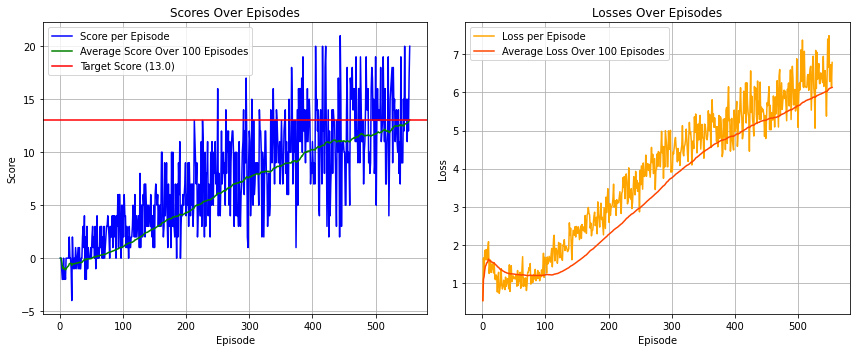

In [5]:
# Plot scores and losses

# Load data from CSV file
df = pd.read_csv('results.csv')

# Extract scores and losses
scores = df['Score']
average_scores = df['Average Score']
losses = df['Loss']
average_losses = df['Average Loss']
episodes = df['Episode']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for scores and average scores with a red line indicating the target score of 13.0
axs[0].plot(episodes, scores, label='Score per Episode', color='blue')
axs[0].plot(episodes, average_scores, label='Average Score Over 100 Episodes', color='green')
axs[0].axhline(y=13.0, color='red', linestyle='-', label='Target Score (13.0)')
axs[0].set_title('Scores Over Episodes')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Score')
axs[0].legend()
axs[0].grid(True)

# Plot for losses and average losses
axs[1].plot(episodes, losses, label='Loss per Episode', color='orange')
axs[1].plot(episodes, average_losses, label='Average Loss Over 100 Episodes', color='orangered')
axs[1].set_title('Losses Over Episodes')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

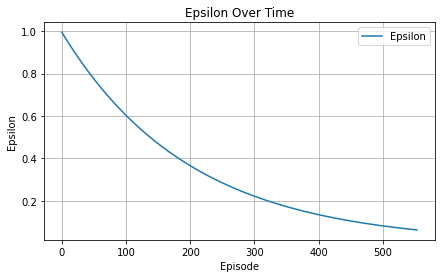

In [6]:
# Plot Epsilon

eps_log = df['Epsilon']

plt.figure(figsize=(7, 4))
plt.plot(eps_log, label='Epsilon')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Over Time')
plt.legend()
plt.grid(True)

plt.show()

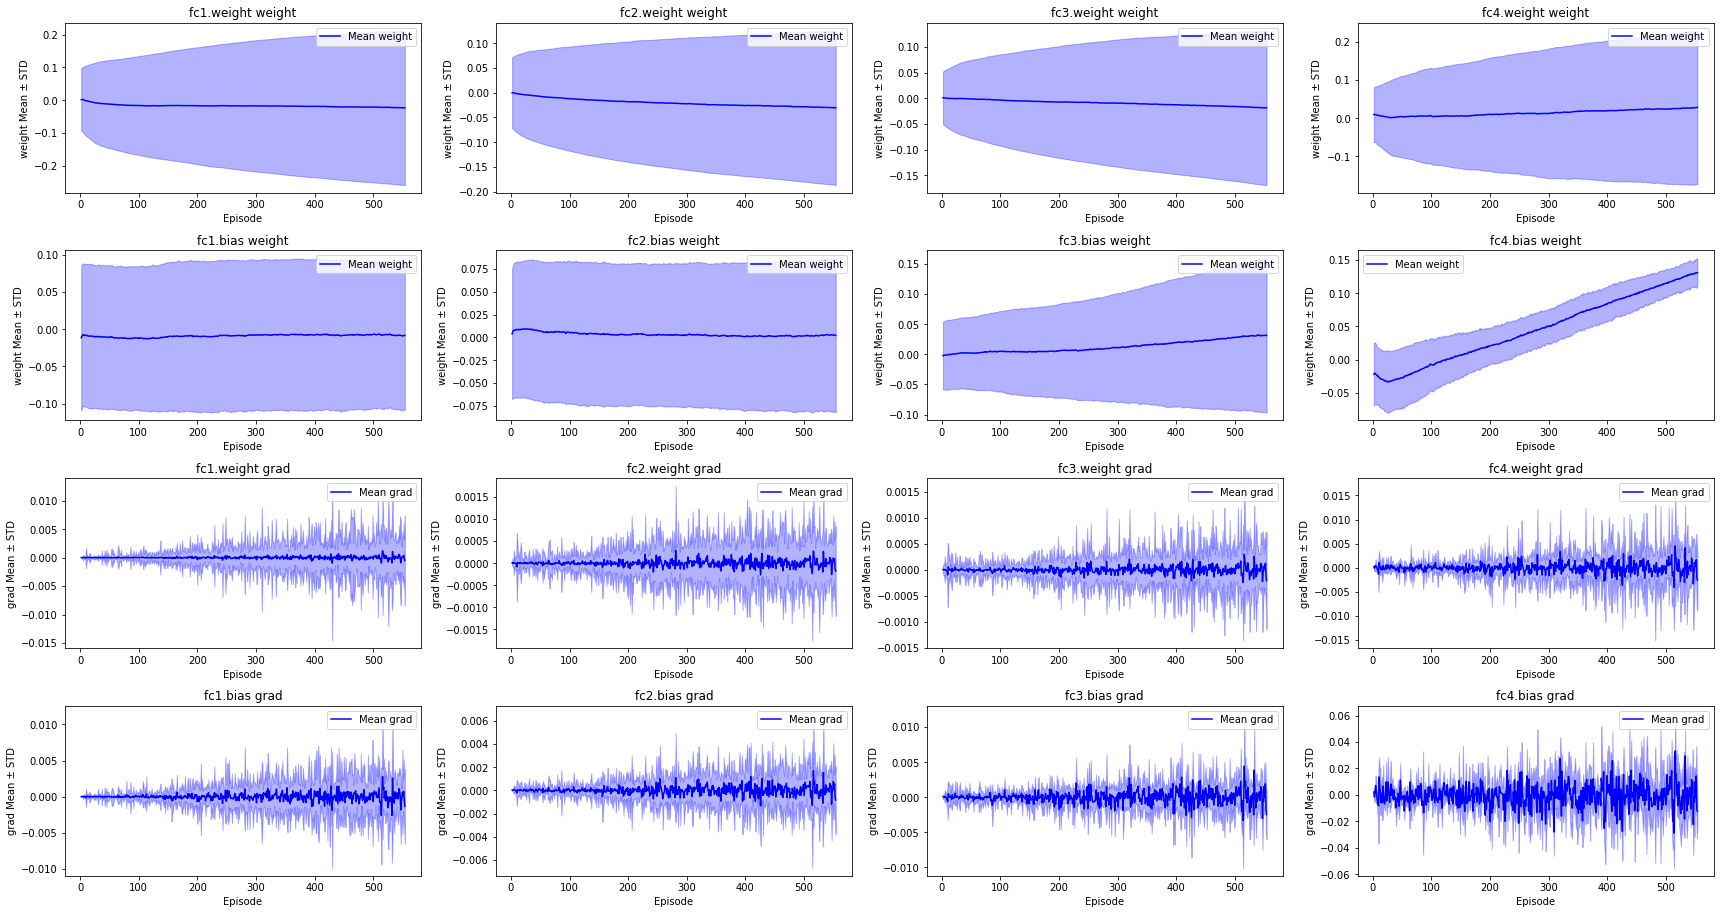

In [7]:
import seaborn as sns
# Plot weights & gradients

# load data from dataframe
weights_df = pd.read_csv('weights_data.csv')
gradients_df = pd.read_csv('gradients_data.csv')


# create a grid of plots with 4 rows for weights and gradients of each layer, and 4 columns for each layer
    # Create a grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(24, 12.8))  # 4 rows for weights & gradients, 4 columns for layers

    # Extract unique layer names for the weights and biases
unique_layers = weights_df['layer'].unique()
weight_layers = [layer for layer in unique_layers if 'weight' in layer]
bias_layers = [layer for layer in unique_layers if 'bias' in layer]

    # Define a function to plot each row
def plot_row(data, row, layer_type, y_label, ax):
    for i, layer in enumerate(layer_type):
        sns.lineplot(
            data=data[data['layer'] == layer],
            x='episode',
            y=f'{y_label}_mean',
            ax=ax[row, i],
            label=f'Mean {y_label}',
            color='blue'
        )
        ax[row, i].fill_between(
            data[data['layer'] == layer]['episode'],
            data[data['layer'] == layer][f'{y_label}_mean'] - data[data['layer'] == layer][f'{y_label}_std'],
            data[data['layer'] == layer][f'{y_label}_mean'] + data[data['layer'] == layer][f'{y_label}_std'],
            alpha=0.3,
            color='blue'
        )
        ax[row, i].set_title(f'{layer} {y_label}')
        ax[row, i].set_xlabel('Episode')
        ax[row, i].set_ylabel(f'{y_label} Mean ± STD')
        ax[row, i].legend()

# Plot for weight layers (row 0 and 1)
for row, layer_type in enumerate([weight_layers, bias_layers]):
    plot_row(weights_df, row, layer_type, 'weight', axes)

# Plot for gradient layers (row 2 and 3)
for row, layer_type in enumerate([weight_layers, bias_layers]):
    plot_row(gradients_df, row + 2, layer_type, 'grad', axes)

# Adjust layout
plt.tight_layout()
plt.show()

### 3. Test the model

In [1]:
import gym
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time

from unityagents import UnityEnvironment

# Load environment from Unity executable
env = UnityEnvironment(file_name="C:/Users/Simon/PYTHON/Deep_Reinforcement_Learning_Nanodegree_UDACITY/Projet1_Bananas/Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


C:\Users\Simon\anaconda3\envs\DRL_udacity_cpu\lib\site-packages\gym\core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
from dqn_agent import Agent

# Create an instance of the agent (make sure it's the same as the one you trained)
agent = Agent(state_size=37, action_size=4, seed=0)

# Load the trained weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

# Set the network to evaluation mode
agent.qnetwork_local.eval()

# Test the agent with the loaded weights
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    # Instead of a random action, use the agent's policy to pick an action
    action = agent.act(state, eps=0.01)  # Use a low epsilon value to favor exploitation
    action = np.int32(action) # pour évityer un bug "'numpy.int64' object has no attribute 'keys' "
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))


Score: 18.0
